### Dimensionality reduction with principal component analysis

In [5]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Load UCI wine data set
# This is originally a classification benchmark dataset
# https://archive.ics.uci.edu/ml/datasets/wine
data=np.genfromtxt('./data/wine.data',delimiter=',')
X=data[:,1:]
n,p=X.shape
print(n,p)
ylab=data[:,0] # Wine type (not used for dimensionality reduction, only to check results below)

178 13


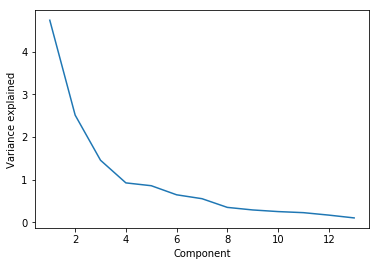

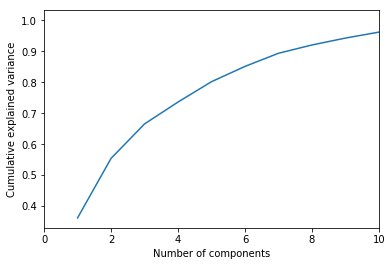

In [6]:
from sklearn.decomposition import PCA

# Scale data to have zero mean and unit variance
# In all cases, the mean has to be removed from the data
# Whether the data should be scaled to have unit variance depends on the application
# I suggest performing this scaling unless you have a good reason not to, e.g. when
# working with image data another type of scaling (whitening transform) should be used
X = StandardScaler().fit_transform(X)
pca = PCA().fit(X)

# The largest eigenvalue is equal to the variance in the data after projecting onto the corresponding
# eigenvector ("first" principal component), the second eigenvalue is equal to the variance in the
# data after projecting onto the corresponding eigenvector ("second principal component") and so on 
plt.plot(np.arange(1,p+1), pca.explained_variance_) # These are the eigenvalues, sorted in descending order
plt.xlabel('Component')
plt.ylabel('Variance explained')
plt.show()

plt.figure()
plt.plot(np.arange(1,p+1), np.cumsum(pca.explained_variance_ratio_)) # This is sum_{i=1}^k (lambda_i) / sum(lambda)
plt.xlim(0,10)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

The upper plot shows that the variance starts to level off once we include four components.
We sometimes observe a "knee" in such figures which can give an indication of an appropriate
size of the subspace.
 
From the lower plot we see that the two largest principal components explain ~55% of the variance in the data. This means that a 2D projection of the data, e.g. for visualization, will retain 55% of the total variance.

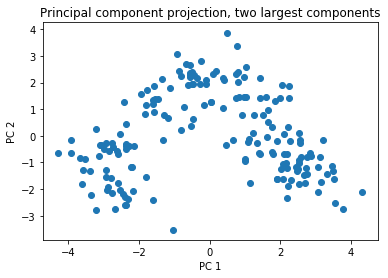

In [7]:
# Project original data to two-dimensions using the two largest principal components
# and visualize with a scatter plot. Sometimes components 1 vs 3 or 2 vs 3 can give
# interesting projections
pca = PCA(n_components=2)
pca.fit(X)
Xred = pca.transform(X)
plt.scatter(Xred[:,0],Xred[:,1])
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal component projection, two largest components')
plt.show()

While there are no clearly separated clusters, three areas in the above figure
have a somewhat high density of points, suggesting three clusters. We can check this using the class labels to color individual points (this is not possible in a truly unsupervised setting where labels are unknown).

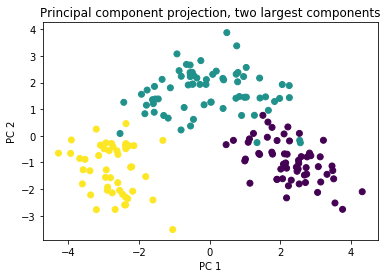

In [19]:
plt.scatter(Xred[:,0],Xred[:,1],c=ylab)
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.title('Principal component projection, two largest components')
plt.show()

### Visualization with t-SNE

In [11]:
# t-Stoachastic neighbor embedding (t-SNE)

# The version used here was downloaded from https://lvdmaaten.github.io/tsne/
# See this page for more examples and troubleshooting info
#
# In this implementation the data is first projected to a 30-dimensional subspace
# using PCA. This speeds up the optimization of the cost function used to find the
# 2D (or 3D) projection and also reduces noise in the original data which can improve
# the quality of the visualization
#
# Run several times and pick result with lowest error

from tsne import tsne
#  Perplexity values ("effective number of neighbors") typically between 5 and 50
yfit=tsne(X, no_dims=2, perplexity=10.0)

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 178...
Mean value of sigma: 1.171753
Iteration 100: error is 13.829051
Iteration 200: error is 0.678222
Iteration 300: error is 0.606132
Iteration 400: error is 0.587873
Iteration 500: error is 0.582455
Iteration 600: error is 0.578282
Iteration 700: error is 0.574735
Iteration 800: error is 0.571536
Iteration 900: error is 0.568523
Iteration 1000: error is 0.565702


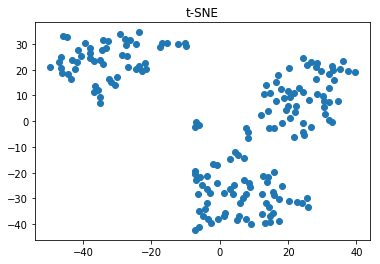

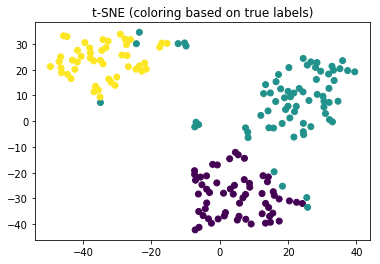

In [12]:
# Visualize the results
    plt.scatter(yfit[:,0],yfit[:,1])
    plt.title('t-SNE')
    plt.show()

plt.scatter(yfit[:,0],yfit[:,1],c=ylab)
plt.title('t-SNE (coloring based on true labels)')
plt.show()

In [1]:
# Principal component analysis and t-SNE used to examine
# the MNIST dataset of handwritten digits

import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Load MNIST dataset (small subset)
X = np.loadtxt("data/mnist2500_X.txt")
labels = np.loadtxt("data/mnist2500_labels.txt")

# Scale data to have zero mean, scaling individual features 
# is not appropriate for image data
Xsc = StandardScaler(with_std=False).fit_transform(X)

def scatter_plot(ypred, labels, xlabel='', ylabel=''):
    # Create a scatter plot with class labels as a legend
    #plt.figure(figsize=(7,5))
    cmap=plt.get_cmap("Paired").colors[0:10]
    for cls in range(0,10):
        plt.scatter(ypred[labels==cls,0],ypred[labels==cls,1],s=10,c=cmap[cls],label="{}".format(cls))
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

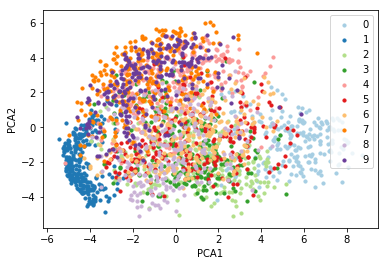

In [2]:
# 2D projection using PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(Xsc)
ypred = pca.transform(Xsc)

scatter_plot(ypred, labels, xlabel='PCA1',ylabel='PCA2')

Apart from the digits 1 (bottom left) and 0 (bottom right) there is a strong overlap between the different digits.

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 2500...
Computing P-values for point 500 of 2500...
Computing P-values for point 1000 of 2500...
Computing P-values for point 1500 of 2500...
Computing P-values for point 2000 of 2500...
Mean value of sigma: 2.573319
Iteration 100: error is 15.501664
Iteration 200: error is 1.243891
Iteration 300: error is 1.089105
Iteration 400: error is 1.035384
Iteration 500: error is 1.010060
Iteration 600: error is 0.995948
Iteration 700: error is 0.987080
Iteration 800: error is 0.981357
Iteration 900: error is 0.977290
Iteration 1000: error is 0.974297


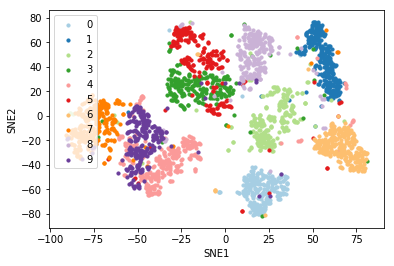

In [3]:
# MNIST 2D projection with t-SNE
from tsne import tsne

# The t-sne implementation is from Laurens van der Maaten
# Note: In order to use the scikit-learn t-sne implementation
# you should perform an initial dimensionality reduction with
# PCA to 30 to 50 dimensions prior to calling TSNE
ypred=tsne(Xsc, no_dims=2, initial_dims=50, perplexity=30.0)
scatter_plot(ypred, labels, xlabel='SNE1',ylabel='SNE2')

# It is recommended to run t-SNE a few times and pick the solution
# with the lowest objective function value ("error")

t-SNE gives a much better separation. There is still some overlap (e.g. digits 3 and 5) but now six classes are more less separated from the rest.

## Clustering with k-means and visualizing the results with t-SNE

Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 178...
Mean value of sigma: 1.672639
Iteration 100: error is 11.740705
Iteration 200: error is 0.374781
Iteration 300: error is 0.355100
Iteration 400: error is 0.354979
Iteration 500: error is 0.354977
Iteration 600: error is 0.354977
Iteration 700: error is 0.354977
Iteration 800: error is 0.354977
Iteration 900: error is 0.354977
Iteration 1000: error is 0.354977


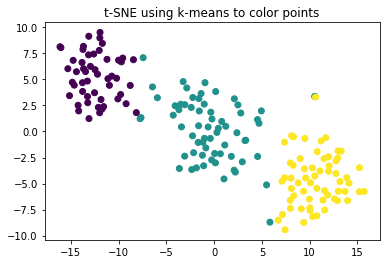

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from tsne import tsne

# Use wine data from above (13 dimensional)

data=np.genfromtxt('./data/wine.data',delimiter=',')
X=data[:,1:]
X = StandardScaler().fit_transform(X)

K=3 # Since we know that there are three types of wine, we therefore select K=3
kmeans = KMeans(n_clusters=K, random_state=0).fit(X)

# Labels are in kmeans.labels_
# Cluster centers are in kmeans.cluster_centers_ (here 13 dimensional)

# Project data into 2D with t-SNE using results from k-means to color the points
yfit=tsne(X, no_dims=2, perplexity=30.0)
plt.scatter(yfit[:,0],yfit[:,1],c=kmeans.labels_)
plt.title('t-SNE using k-means to color points')
plt.show()

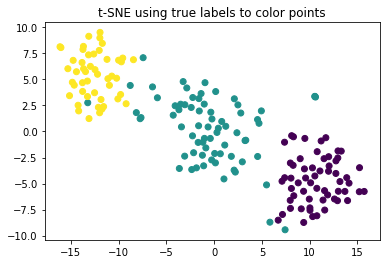

In [17]:
# Compare with true labels
# Note that the cluster number has no particular meaning due to the random initialization
# used by the alforith, e.g. after one run of the algorithm a set of points may fall into
# "Cluster 1", on another run the same set of points may fall into "Cluster 3".
# Hence the color of individual clusters in the two figures need not to agree
plt.scatter(yfit[:,0],yfit[:,1],c=ylab)
plt.title('t-SNE using true labels to color points')
plt.show()

K-means (with K=3) captures the different classes in this data set quite well